<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/01__neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Start

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.17.1'

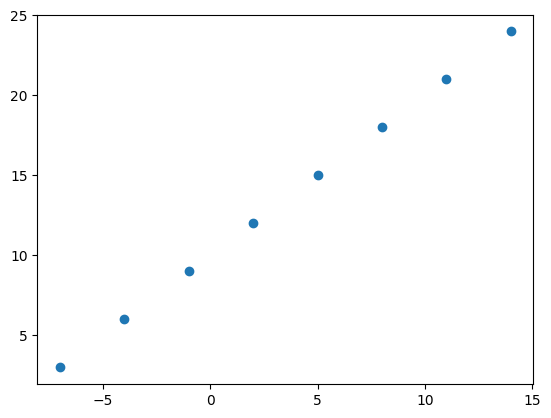

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize data
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [6]:
# Create a demo tensor
house_features = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_features, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X.shape, y.shape

((8,), (8,))

In [8]:
X[0].shape, y[0].shape

((), ())

In [9]:
X[0].ndim

0

In [16]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in modeling tensorflow model

1. Creating a model - defining input, output and hidden layers
2. Compiling - defining loss function and evaluation metrics
3. Fitting model

In [26]:
# Set random seed
tf.random.set_seed(42)

# Creating a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# or can create like that:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# Compiling model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step - loss: 18.2438 - mae: 18.2438
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.9625 - mae: 17.9625
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.6813 - mae: 17.6813
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.4000 - mae: 17.4000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 17.1188 - mae: 17.1188
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 16.8375 - mae: 16.8375
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.5563 - mae: 16.5563
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.2750 - mae: 16.2750
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 15.9938 - mae: 15.9938
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15.7125 - mae: 15.7125


In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Try to make a prediction
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[27.883467]], dtype=float32)

### Improving model

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [47]:
# Rebuilding model and tuning it
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9787 - mae: 12.9787
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 12.1157 - mae: 12.1157
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.2653 - mae: 11.2653
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.4210 - mae: 10.4210
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.6076 - mae: 9.6076
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.0172 - mae: 9.0172
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.4130 - mae: 8.4130
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.7950 - mae: 7.7950
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.1559 - mae: 7.1559
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4965 - mae: 6.4965
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8069 - mae: 5.8069
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0819 - mae: 5.0819
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6

In [28]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [48]:
# Try to make a prediction
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[27.78405]], dtype=float32)

### Evaluating model

In [5]:
# Create bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [6]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

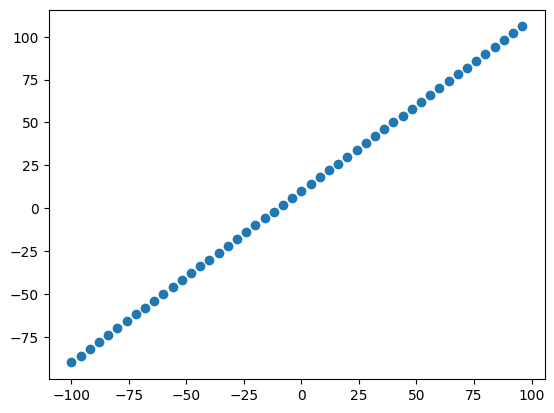

In [53]:
# Visualize data
plt.scatter(X, y)

# Data is splitted into 3 sets:

* **Training set** - model fitting on that
* **Validation set** - tuning model on that
* **Test set** - final evaluation set


In [7]:
(X_train, y_train), (X_test, y_test) = (X[:40], y[:40]), (X[40:], y[40:])
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing splitted data

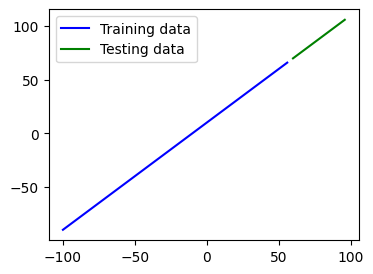

In [59]:
plt.figure(figsize=(4, 3))
# Plot training data in blue
plt.plot(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.plot(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)

### Visualizing model

In [63]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
import tensorflow as tf

# Creating a model, that builds automatically using input_shape
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
#    tf.keras.layers.Dense(100, name="hidden_layer_1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="test_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

In [27]:
model.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [93]:
# Fit the model
# every time we fitting a model, epochs stack up: 100 -> 200 -> 300 -> ...
model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

In [41]:
model.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

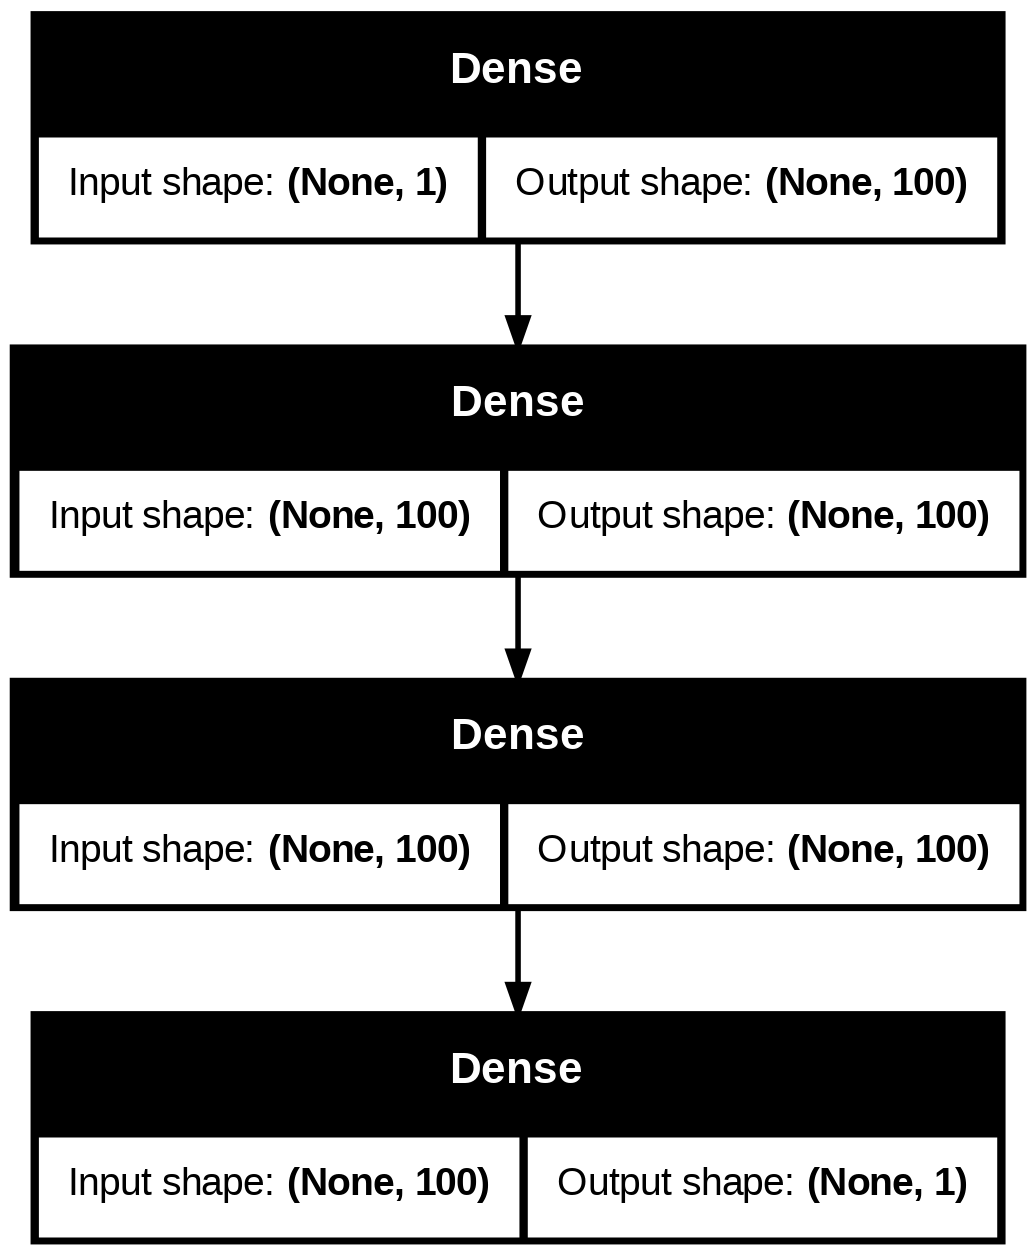

In [54]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model's predictions

In [94]:
# Make predictions
y_preds = model.predict(y_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[ 68.11902 ],
       [ 71.915886],
       [ 75.71275 ],
       [ 79.50962 ],
       [ 83.30649 ],
       [ 87.10335 ],
       [ 90.900215],
       [ 94.69709 ],
       [ 98.49395 ],
       [102.29081 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
import matplotlib.pyplot as plt

In [48]:
def plot_predictions(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, predictions=y_preds):
  plt.figure(figsize=(4, 3))
  # Plot training data in blue
  plt.plot(X_train, y_train, c='b', label='Training data')
  # Plot test data in green
  plt.plot(X_test, y_test, c='g', label='Testing data')
  # Plot predictions
  plt.plot(X_test, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

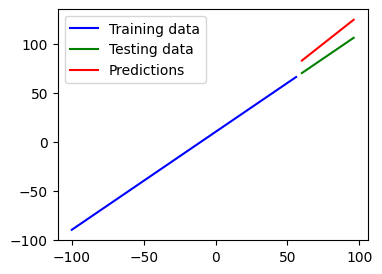

In [95]:
plot_predictions()

### Evaluating model's predictions with evaluation metrics

**2 common metrics:**
* MAE - mean absolute error
* MSE - mean squared error

(where's RMSE?..)

In [96]:
# Evaluate model on the test data
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 12.2872 - mae: 12.2872


[12.287245750427246, 12.287245750427246]

In [72]:
# Calculate Mean Absolute Error
tf.keras.metrics.MAE(y_test, y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9.708054 , 9.700363 , 9.692665 , 9.684967 , 9.677277 , 9.669579 ,
       9.6618805, 9.654182 , 9.646484 , 9.638786 ], dtype=float32)>

In [83]:
# Calculate Mean Squared Error
tf.keras.metrics.MSE(y_test, y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([94.24631 , 94.097046, 93.947754, 93.798584, 93.64968 , 93.50075 ,
       93.35194 , 93.20324 , 93.05466 , 92.906204], dtype=float32)>

In [82]:
import numpy as np
np.sqrt(np.mean((y_preds - y_test) ** 2))

18.57417562100671

In [84]:
y_test - y_preds

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -9,  -5,  -1,   3,   7,  11,  15,  19,  23,  27],
       [-13,  -9,  -5,  -1,   3,   7,  11,  15,  19,  23],
       [-17, -13,  -9,  -5,  -1,   3,   7,  11,  15,  19],
       [-21, -17, -13,  -9,  -5,  -1,   3,   7,  11,  15],
       [-25, -21, -17, -13,  -9,  -5,  -1,   3,   7,  11],
       [-29, -25, -21, -17, -13,  -9,  -5,  -1,   3,   7],
       [-33, -29, -25, -21, -17, -13,  -9,  -5,  -1,   3],
       [-37, -33, -29, -25, -21, -17, -13,  -9,  -5,  -1],
       [-41, -37, -33, -29, -25, -21, -17, -13,  -9,  -5],
       [-45, -41, -37, -33, -29, -25, -21, -17, -13,  -9]], dtype=int32)>

In [85]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [86]:
y_preds

array([[ 79.70805 ],
       [ 83.70036 ],
       [ 87.692665],
       [ 91.68497 ],
       [ 95.67728 ],
       [ 99.66958 ],
       [103.66188 ],
       [107.65418 ],
       [111.646484],
       [115.63879 ]], dtype=float32)

In [87]:
# Predictions have one more dimention...
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 79.70805 ],
       [ 83.70036 ],
       [ 87.692665],
       [ 91.68497 ],
       [ 95.67728 ],
       [ 99.66958 ],
       [103.66188 ],
       [107.65418 ],
       [111.646484],
       [115.63879 ]], dtype=float32)>

In [88]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 79.70805 ,  83.70036 ,  87.692665,  91.68497 ,  95.67728 ,
        99.66958 , 103.66188 , 107.65418 , 111.646484, 115.63879 ],
      dtype=float32)>

In [97]:
# Calcucate MAE again
tf.keras.metrics.MAE(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.795082>

In [100]:
# Calculate MSE
tf.keras.metrics.MSE(y_true=y_test, y_pred=tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=8.152906>

In [99]:
# Huber error
tf.keras.losses.huber(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.295082>

In [101]:
def mae(y_test, y_pred):
  return tf.keras.metrics.MAE(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.keras.metrics.MSE(y_test, tf.squeeze(y_pred))